In [1]:
# Let's build recommendation system using K-NN

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\mbugu\OneDrive\Desktop\ML DATASET\IMDb Dataset(2024)\IMDb_Dataset.csv")
df.head()

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3


In [4]:
# Basic Information
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               400 non-null    object 
 1   IMDb Rating         400 non-null    float64
 2   Year                400 non-null    int64  
 3   Certificates        400 non-null    object 
 4   Genre               400 non-null    object 
 5   Director            400 non-null    object 
 6   Star Cast           400 non-null    object 
 7   MetaScore           400 non-null    float64
 8   Duration (minutes)  400 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 28.3+ KB
None


In [5]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,IMDb Rating,Year,MetaScore,Duration (minutes)
count,400.000000,400.000000,400.000000,400.000000
mean,7.110250,2015.150000,66.898750,116.334750
std,0.932251,13.470194,15.312006,21.369757
min,3.900000,1939.000000,26.000000,80.000000
25%,6.700000,2010.750000,57.750000,101.000000
50%,7.100000,2023.000000,66.900000,116.000000
75%,7.700000,2024.000000,77.000000,124.000000
max,9.200000,2025.000000,100.000000,206.000000


In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Duration (minutes)    0
dtype: int64


In [7]:
df = df.drop_duplicates()

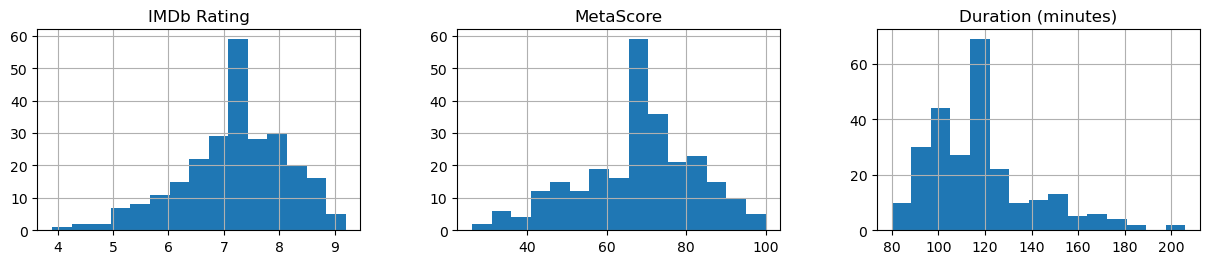

In [8]:
#EDA
# Univariate Analysis
# Histograms for numerical features
numerical_cols = ['IMDb Rating', 'MetaScore', 'Duration (minutes)']
df[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

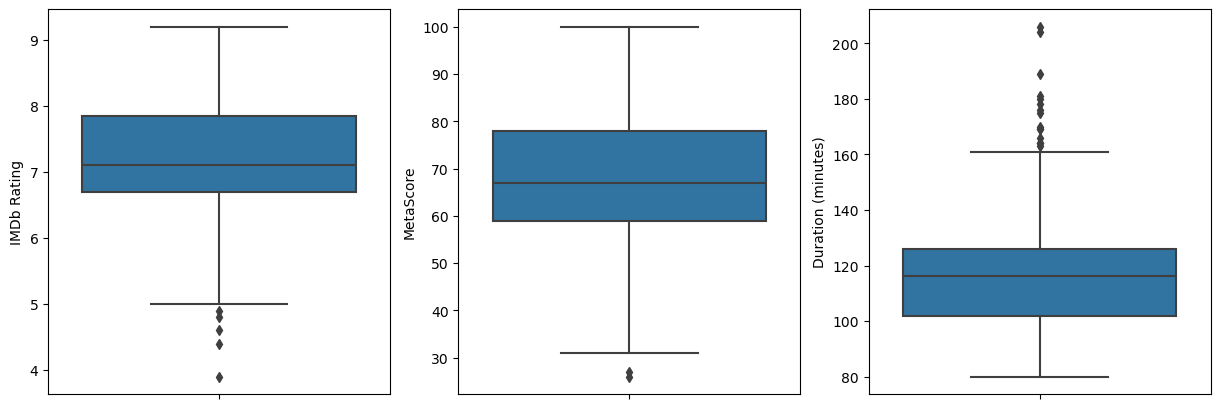

In [9]:
# Box plots for numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=col, data=df)
plt.show()

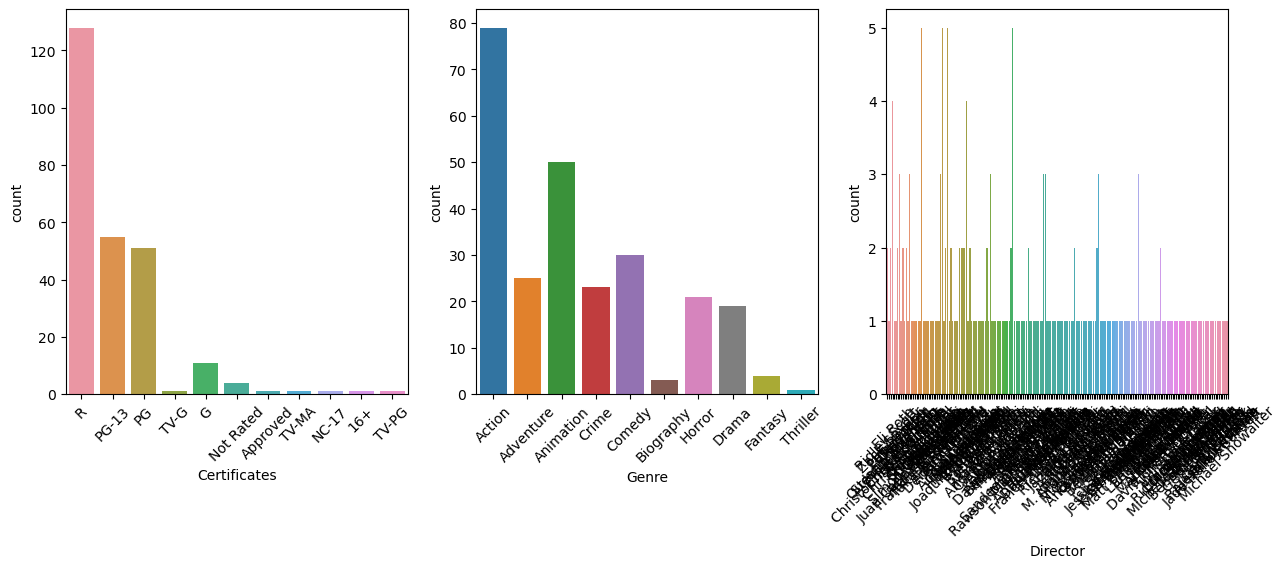

In [10]:
# Bar plots for categorical features
categorical_cols = ['Certificates', 'Genre', 'Director']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
plt.show()

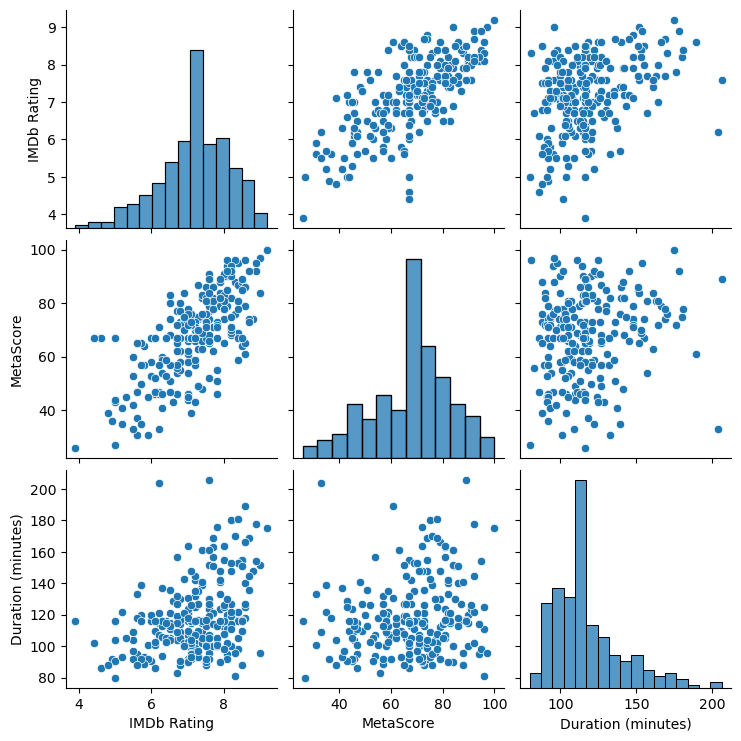

In [11]:
# Bivariate Analysis
# Scatter plots for numerical features
sns.pairplot(df[numerical_cols])
plt.show()


Correlation Matrix:
                    IMDb Rating  MetaScore  Duration (minutes)
IMDb Rating            1.000000   0.702471            0.375488
MetaScore              0.702471   1.000000            0.181712
Duration (minutes)     0.375488   0.181712            1.000000


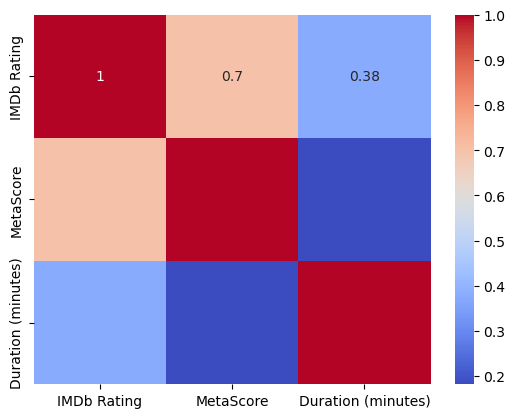

In [12]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
# Preprocess the categorical data
categorical_cols = ['Genre', 'Director', 'Star Cast']
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(df[categorical_cols])

# Combine with numerical features
numerical_cols = ['IMDb Rating', 'MetaScore', 'Duration (minutes)']
numerical_features = df[numerical_cols].values

In [14]:
# Normalize numerical features
scaler = StandardScaler()
normalized_numerical_features = scaler.fit_transform(numerical_features)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 components for illustration
pca_features = pca.fit_transform(normalized_numerical_features)

# Combine all features into a single feature set
features = np.hstack([pca_features, encoded_features.toarray()])

In [15]:
# Fit k-NN model
knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn.fit(features)


NearestNeighbors()

In [16]:
def get_recommendations(title, k=5):
    # Strip leading and trailing whitespaces from the title
    title = title.strip()
    # Check if the title exists in the DataFrame
    if title not in df['Title'].values:
        print(f"Movie '{title}' not found in the dataset.")
        return None, None
    
    # Find the index of the movie
    idx = df.index[df['Title'] == title].tolist()[0]
    # Ensure k does not exceed the number of samples
    k = min(k, len(df) - 1)
    # Find k nearest neighbors
    distances, indices = knn.kneighbors([features[idx]], n_neighbors=k+1)
    # Get the indices of the recommended movies
    rec_indices = indices.flatten()[1:]
    # Return the index and titles and years of the recommended movies
    return idx, df.iloc[rec_indices][['Title', 'Year']]

5 recommended movies based on your interest: 
                       Title  Year
130          The Dark Knight  2008
49   Furiosa: A Mad Max Saga  2024
213        Blade Runner 2049  2017
211               The Matrix  1999
208  Spider-Man: No Way Home  2021


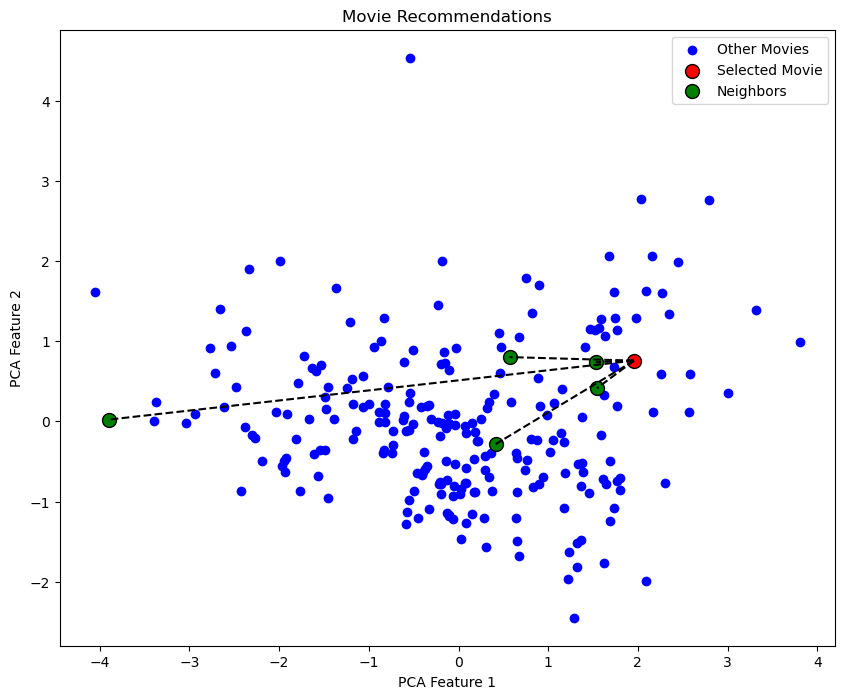

In [17]:
# Example usage
# title = input("Enter a movie you like to get recommendations: ")
title = 'Inception'
idx, recommendations = get_recommendations(title, k=5)
print("5 recommended movies based on your interest: ")
print(recommendations)

# Plotting
plt.figure(figsize=(10, 8))

# Plot all movies in blue
plt.scatter(pca_features[:, 0], pca_features[:, 1], c='blue', label='Other Movies')

# Plot the target movie in red
plt.scatter(pca_features[idx, 0], pca_features[idx, 1], c='red', label='Selected Movie', edgecolors='black', s=100)

# Plot the nearest neighbors in green
rec_indices = recommendations.index
plt.scatter(pca_features[rec_indices, 0], pca_features[rec_indices, 1], c='green', label='Neighbors', edgecolors='black', s=100)

# Draw lines from the target movie to its neighbors
for i in rec_indices:
    plt.plot([pca_features[idx, 0], pca_features[i, 0]], [pca_features[idx, 1], pca_features[i, 1]], 'k--')

plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Movie Recommendations')
plt.legend()
plt.show()

In [18]:
#2
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
data = pd.read_csv(r"C:\Users\mbugu\OneDrive\Desktop\ML DATASET\IMDb Dataset(2024)\IMDb_Dataset.csv")

In [22]:
data.head(10)

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Duration (minutes)
0,Gladiator,8.5,2000,R,Action,Ridley Scott,David FranzoniJohn LoganWilliam Nicholson,67.0,155.0
1,Mission: Impossible - Dead Reckoning Part One,7.7,2023,PG-13,Action,Christopher McQuarrie,Tom CruiseHayley AtwellVing Rhames,81.0,163.0
2,Rebel Moon - Part Two: The Scargiver,5.2,2024,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,35.0,122.0
3,Inglourious Basterds,8.4,2009,R,Adventure,Quentin Tarantino,Brad PittDiane KrugerEli Roth,69.0,153.0
4,Borderlands,7.1,2024,R,Action,Eli Roth,Eli RothJoe Crombie,66.9,116.3
5,Jurassic Park,8.2,1993,PG-13,Action,Steven Spielberg,Michael CrichtonDavid Koepp,68.0,127.0
6,The Fifth Element,7.6,1997,PG-13,Action,Luc Besson,Luc BessonRobert Mark Kamen,52.0,126.0
7,Inside Out,8.1,2015,PG,Animation,Pete Docter,Pete DocterRonnie Del CarmenMeg LeFauve,94.0,95.0
8,Descendants: The Rise of Red,7.1,2024,TV-G,Action,Jennifer Phang,Rita OraJoshua ColleyChina Anne McClain,66.9,116.3
9,Wish,5.6,2023,PG,Animation,Chris Buck,Jennifer LeeAllison MooreChris Buck,47.0,95.0


In [23]:
#The dataset contains the following columns:

#1.Title: The name of the movie.
#2.IMDb Rating: The IMDb rating of the movie.
#3.Year: The year the movie was released.
#4.Certificates: The certification of the movie (e.g., R, PG-13).
#5.Genre: The genre(s) of the movie.
#6.Director: The director of the movie.
#7.Star Cast: The main actors in the movie.
#8.MetaScore: The Metacritic score of the movie
#9.Duration (minutes): The duration of the movie in minutes.

In [24]:
#Analyzing Relationships
#We'll analyze the relationships between IMDb ratings and the following features:

#Year
#Certificates
#Genre
#Director
#MetaScore
#Duration (minutes)

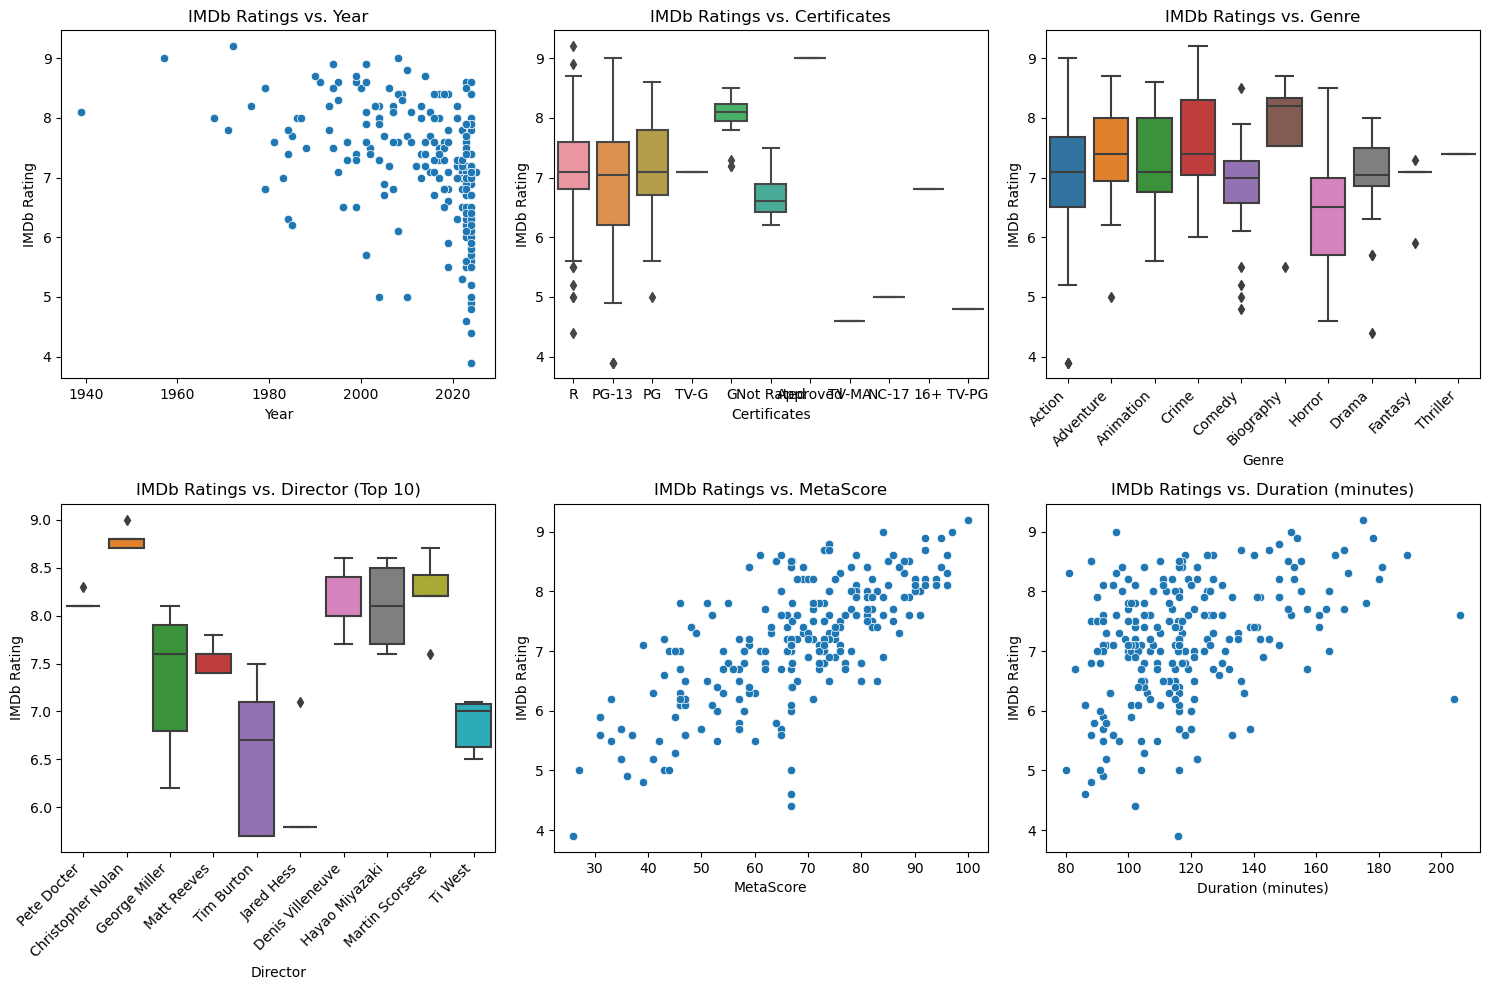

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# IMDb Ratings vs. Year
plt.subplot(2, 3, 1)
sns.scatterplot(data=data, x='Year', y='IMDb Rating')
plt.title('IMDb Ratings vs. Year')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')

# IMDb Ratings vs. Certificates
plt.subplot(2, 3, 2)
sns.boxplot(data=data, x='Certificates', y='IMDb Rating')
plt.title('IMDb Ratings vs. Certificates')
plt.xlabel('Certificates')
plt.ylabel('IMDb Rating')

# IMDb Ratings vs. Genre
plt.subplot(2, 3, 3)
sns.boxplot(data=data, x='Genre', y='IMDb Rating')
plt.title('IMDb Ratings vs. Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')

# IMDb Ratings vs. Director (Top 10 Directors by count)
top_directors = data['Director'].value_counts().index[:10]
plt.subplot(2, 3, 4)
sns.boxplot(data=data[data['Director'].isin(top_directors)], x='Director', y='IMDb Rating')
plt.title('IMDb Ratings vs. Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45, ha='right')

# IMDb Ratings vs. MetaScore
plt.subplot(2, 3, 5)
sns.scatterplot(data=data, x='MetaScore', y='IMDb Rating')
plt.title('IMDb Ratings vs. MetaScore')
plt.xlabel('MetaScore')
plt.ylabel('IMDb Rating')

# IMDb Ratings vs. Duration (minutes)
plt.subplot(2, 3, 6)
sns.scatterplot(data=data, x='Duration (minutes)', y='IMDb Rating')
plt.title('IMDb Ratings vs. Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Rating')

plt.tight_layout()
plt.show()

In [26]:
#Analysis of plots

#IMDb Ratings vs. Year:

# Thescatter plot shows the distribution of IMDb ratings over different years. There's no clear trend, suggesting that movie ratings haven't significantly changed over time.

# IMDb Ratings vs. Certificates:

# The box plot illustrates the IMDb ratings across different certification categories. Movies with an "R" rating show a wider range of ratings compared to other certifications.

#IMDb Ratings vs. Genre:
# The box plot displays the IMDb ratings for different genres. Genres like Adventure and Drama have a wider range of ratings, whereas genres like Action tend to have ratings that are more closely clustered.

# IMDb Ratings vs. Director (Top 10 Directors):
# The box plot compares the IMDb ratings for movies directed by the top 10 directors by movie count. Directors like Quentin Tarantino and Ridley Scott generally have higher ratings for their movies.

# IMDb Ratings vs. MetaScore:
# The scatter plot examines the relationship between IMDb ratings and Metascores. There is a positive correlation, indicating that movies with higher Metascores also tend to have higher IMDb ratings.

# IMDb Ratings vs. Duration (minutes):
# The scatter plot explores the relationship between IMDb ratings and movie duration. There is no clear trend, suggesting that the length of a movie doesn't significantly impact its IMDb rating.

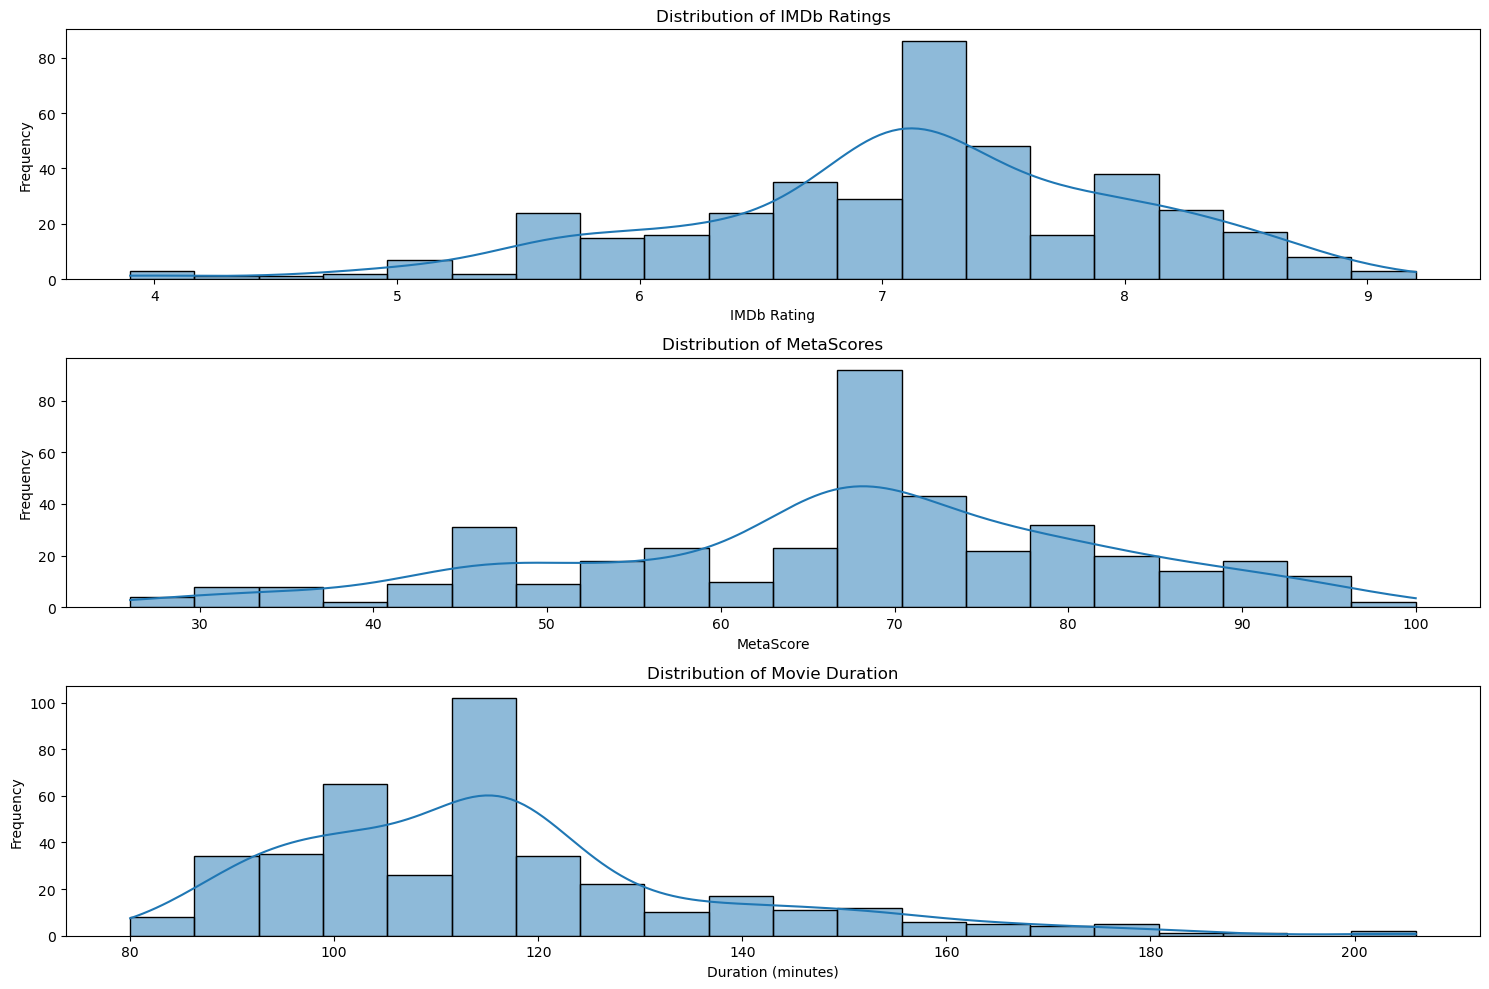

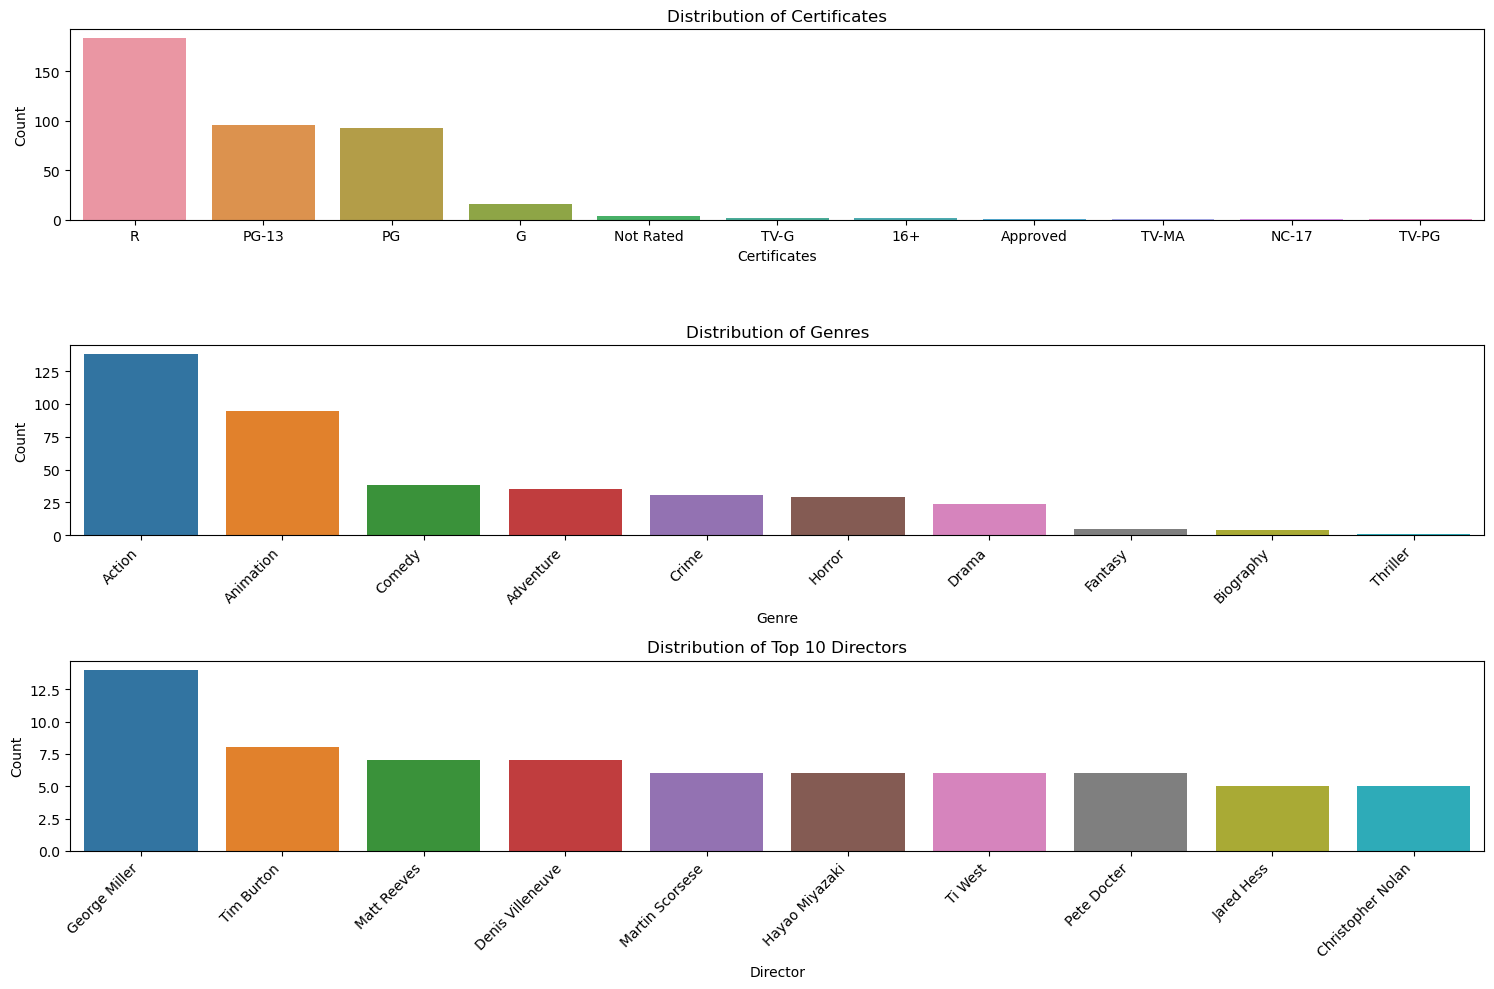

In [27]:
#EDA
import warnings
warnings.filterwarnings('ignore')
# Distribution Analysis of Numerical Features
plt.figure(figsize=(15, 10))

# IMDb Rating Distribution
plt.subplot(3, 1, 1)
sns.histplot(data['IMDb Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

# MetaScore Distribution
plt.subplot(3, 1, 2)
sns.histplot(data['MetaScore'], bins=20, kde=True)
plt.title('Distribution of MetaScores')
plt.xlabel('MetaScore')
plt.ylabel('Frequency')

# Duration Distribution
plt.subplot(3, 1, 3)
sns.histplot(data['Duration (minutes)'], bins=20, kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Distribution Analysis of Categorical Features
categorical_summary = data[['Certificates', 'Genre', 'Director']].describe()

plt.figure(figsize=(15, 10))

# Certificates Distribution
plt.subplot(3, 1, 1)
sns.countplot(data=data, x='Certificates', order=data['Certificates'].value_counts().index)
plt.title('Distribution of Certificates')
plt.xlabel('Certificates')
plt.ylabel('Count')

# Genre Distribution
plt.subplot(3, 1, 2)
sns.countplot(data=data, x='Genre', order=data['Genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Director Distribution (Top 10 Directors)
top_10_directors = data['Director'].value_counts().index[:10]
plt.subplot(3, 1, 3)
sns.countplot(data=data[data['Director'].isin(top_10_directors)], x='Director', order=top_10_directors)
plt.title('Distribution of Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [28]:
#IMDb Rating Distribution: The majority of movies have IMDb ratings between 6 and 8, with a peak around 7.

#MetaScore Distribution: MetaScores are more widely spread out, with many movies scoring between 50 and 80.

# Duration Distribution: Most movies have a duration between 100 and 130 minutes.

# Certificates: "R" rated movies are the most common, followed by "PG-13" and "PG".

# Genre: Action is the most frequent genre, followed by Adventure and Comedy.

# Director (Top 10): The top directors with the most movies in the dataset are George Miller, Quentin Tarantino, and others.


In [29]:
#Descriptive statics
descriptive_stats = data.describe()
print(descriptive_stats)
categorical_summary

       IMDb Rating         Year   MetaScore  Duration (minutes)
count   400.000000   400.000000  400.000000          400.000000
mean      7.110250  2015.150000   66.898750          116.334750
std       0.932251    13.470194   15.312006           21.369757
min       3.900000  1939.000000   26.000000           80.000000
25%       6.700000  2010.750000   57.750000          101.000000
50%       7.100000  2023.000000   66.900000          116.000000
75%       7.700000  2024.000000   77.000000          124.000000
max       9.200000  2025.000000  100.000000          206.000000


,Certificates,Genre,Director
count,400,400,400
unique,11,10,199
top,R,Action,George Miller
freq,183,138,14


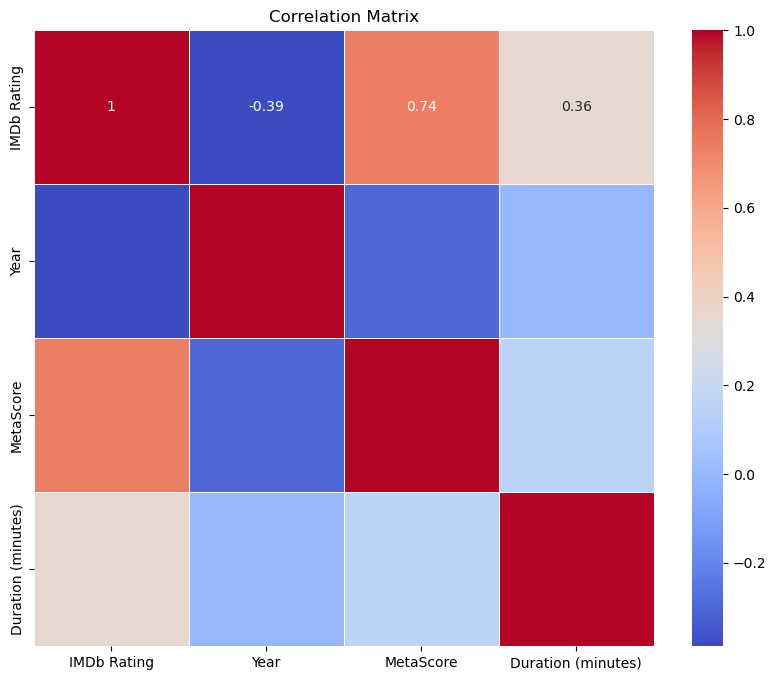

In [30]:
#this is the correlation matrix
correlation_matrix = data.drop(['Director','Genre','Certificates','Title','Star Cast'],axis = 1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [31]:
# There is a positive correlation (0.74), indicating that higher MetaScores generally align with higher IMDb ratings

In [32]:
# Moive Recommendation
# 1.This is a simple Moive Recommendataion system using the above Data

#2.First we take the input in the get recommendation function

#3.Then we take the index of the input and see which data it matches

#4.Then we compute a cosine similarity for this input and all the other entries in the data on combined score

#5.The we sort the cosine similarity and return the top most cosine similar entires in the data (recommendations)

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the dataset
df = data.copy()

# Combine relevant features into a single string
df['combined_features'] = df['Genre'] + ' ' + df['Director'] + ' ' + df['Certificates']

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


# Function to get movie recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df[df['Title'] == title].index[0]
# Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['Title'].iloc[movie_indices]